# 📝 Exercise M5.01

In the previous notebook, we showed how a tree with a depth of 1 level was
working. The aim of this exercise is to repeat part of the previous
experiment for a depth with 2 levels to show how the process of partitioning
is repeated over time.

Before to start, we will:

* load the dataset;
* split the dataset into training and testing dataset;
* define the function to show the classification decision function.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [2]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)
range_features = {
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
}

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

Create a decision tree classifier with a maximum depth of 2 levels and fit
the training data. Once this classifier trained, plot the data and the
decision boundary to see the benefit of increasing the depth.

In [4]:
# Write your code here.
from sklearn.tree import DecisionTreeClassifier

In [7]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data_train,target_train)

DecisionTreeClassifier(max_depth=2)

In [8]:
tree.score(data_test,target_test)

0.9651162790697675

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

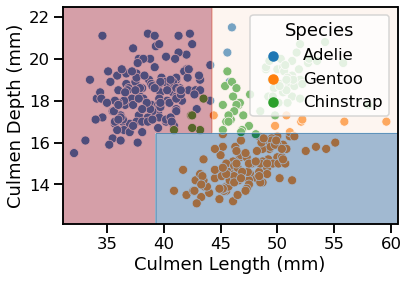

In [12]:
import seaborn as sns
ax = sns.scatterplot(data=penguins, x=culmen_columns[0], y=culmen_columns[1],\
                    hue=target_column)
plot_decision_function(tree, range_features,ax=ax)

Did we make use of the feature "Culmen Length"?
Plot the tree using the function `sklearn.tree.plot_tree` to find out!

In [13]:
# Write your code here.
from sklearn.tree import plot_tree

In [20]:
target.value_counts().index.tolist()

['Adelie', 'Gentoo', 'Chinstrap']

[Text(446.4, 362.4, 'Culmen Depth (mm) <= 16.45\ngini = 0.642\nsamples = 256\nvalue = [107, 53, 96]\nclass = Adelie'),
 Text(223.2, 217.44, 'Culmen Length (mm) <= 39.3\ngini = 0.101\nsamples = 95\nvalue = [4, 1, 90]\nclass = Chinstrap'),
 Text(111.6, 72.47999999999996, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Adelie'),
 Text(334.79999999999995, 72.47999999999996, 'gini = 0.022\nsamples = 91\nvalue = [0, 1, 90]\nclass = Chinstrap'),
 Text(669.5999999999999, 217.44, 'Culmen Length (mm) <= 44.25\ngini = 0.485\nsamples = 161\nvalue = [103, 52, 6]\nclass = Adelie'),
 Text(558.0, 72.47999999999996, 'gini = 0.091\nsamples = 105\nvalue = [100, 5, 0]\nclass = Adelie'),
 Text(781.1999999999999, 72.47999999999996, 'gini = 0.281\nsamples = 56\nvalue = [3, 47, 6]\nclass = Gentoo')]

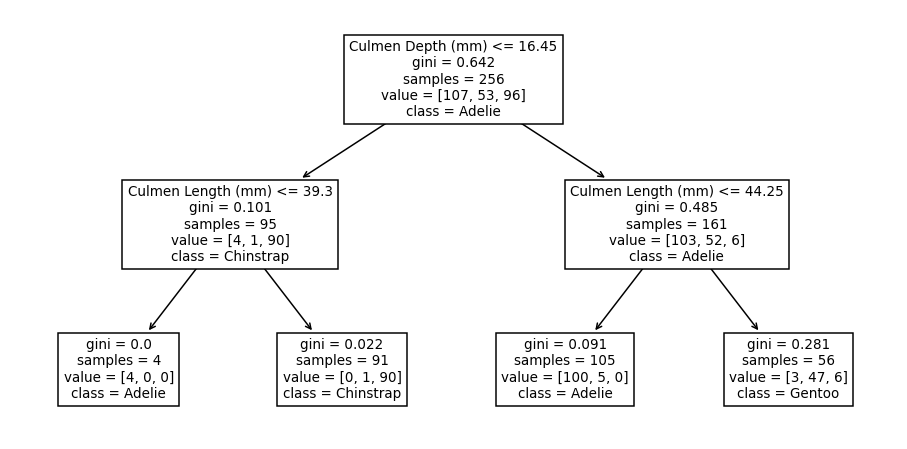

In [28]:
_, ax = plt.subplots(figsize=(16,8))
plot_tree(tree, feature_names=culmen_columns, class_names=\
         target.value_counts().index.tolist(), ax=ax)

Compute the accuracy of the decision tree on the testing data.

In [29]:
# Write your code here.
tree.score(data_test,target_test)

0.9651162790697675